# Outcome dataset pre-process before sending to Datawarehouse
***

## Import files 

In [3]:
# import all the libraries that require for project
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

## Globals

In [4]:
# define paths
INPUT_PATH = "C://SHU/ADMP/Assessment_02/github-repos/admp-csvs/prod/"
OUTPUT_PATH = "C://SHU/ADMP/Assessment_02/github-repos/admp-csvs/stage/"
STAGING_PATH = "C://SHU/ADMP/Assessment_02/github-repos/admp-csvs/stage/"

# create variables to store the datasets name you want to use
STREET_FILENAME = "street-london.csv"
OUTCOME_FILENAME = "outcome-london.csv"
BOROUGH_FILENAME = "boroughs-london.csv"

## Functions

In [5]:
class FILESIZE:
    SMALL = 1
    LARGE = 2
    
def read_csv_file(fileType, fileName):
    if (fileType == FILESIZE.SMALL):
        df_ret = pd.read_csv(fileName)
    else:
        # read the large csv file with specified chunksize of 10 million records
        df_chunk = pd.read_csv(fileName, chunksize=1000000)

        # append each chunk df here
        chunk_list = []   

        # each chunk is in df format
        for chunk in df_chunk:    
            # once the data filtering is done, append the chunk to list
            chunk_list.append(chunk)

        # concat the list into dataframe 
        df_ret = pd.concat(chunk_list)
        
    return df_ret

def get_record_count():
    return outcome_df.shape[0]

def get_boroughs_count():
    # get different boroughs crime that appears here
    boroughs_df = pd.DataFrame()
    boroughs_df['Borough_name'] = outcome_df.LSOA_name[(outcome_df.LSOA_name.isnull()==False)].str[:-5]
    return len(boroughs_df.Borough_name.unique())

def test_duplicate():
    # check what is the differences appearing inside the duplicate record by passsing one Crime ID
    test1_crimeid = '3b60aed0ce6c29f63a00e44822492dcdc419b68a0974e53e6884359dc2aec1aa'
    test2_crimeid = '77e565ce040eda43d5a41bd767c296ffb3c6169ce7047e346095db3226140f69'
    test3_crimeid = '4cd2361bb632061bab05c894a7885a4d03aa3bc01b010f4c63f9f033d606b489'
    test4_crimeid = '8db7fd29320d6346c0646fb59347681c371c01f52d5b1f693bfa4bd3429e6321'
    test5_crimeid = 'e9c2cd701fcdc9fa72c8c7fb2ba63566d9b212ce89a78e5df79f8f354c85a294'

    # outcome_df[outcome_df.Crime_ID.str.contains('3b60aed0ce6c29f63a00e44822492dcdc419b68a0974e5', na=True)]
    rec1_dup_cnt = outcome_df[outcome_df.Crime_ID == test1_crimeid].shape[0]
    rec2_dup_cnt = outcome_df[outcome_df.Crime_ID == test2_crimeid].shape[0]
    rec3_dup_cnt = outcome_df[outcome_df.Crime_ID == test3_crimeid].shape[0]
    rec4_dup_cnt = outcome_df[outcome_df.Crime_ID == test4_crimeid].shape[0]
    rec5_dup_cnt = outcome_df[outcome_df.Crime_ID == test5_crimeid].shape[0]

    # return counts
    print('First crime id duplicate record count: ', rec1_dup_cnt)
    print('Second crime id duplicate record count: ', rec2_dup_cnt)
    print('Third crime id duplicate record count: ', rec3_dup_cnt)
    print('Fourth crime id duplicate record count: ', rec4_dup_cnt)
    print('Fifth crime id duplicate record count: ', rec5_dup_cnt)

## Read CSV file

In [6]:
# set a working directory to the location where input dataset csv file exist
os.chdir(INPUT_PATH)

# load dataframe with outcome data from CSV file 
outcome_df = read_csv_file(FILESIZE.LARGE, OUTCOME_FILENAME)

# store london borough data into dataframe
london_borough_df = read_csv_file(FILESIZE.SMALL, BOROUGH_FILENAME)

In [9]:
outcome_df.isna().sum()

Crime_ID            0
Month               0
Reported_by         0
Falls_within        0
Longitude       22063
Latitude        22063
Location            0
LSOA_code       22063
LSOA_name       22063
Outcome_type        0
dtype: int64

In [8]:
outcome_df.info()
london_borough_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236024 entries, 0 to 1236023
Data columns (total 10 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Crime_ID      1236024 non-null  object 
 1   Month         1236024 non-null  object 
 2   Reported_by   1236024 non-null  object 
 3   Falls_within  1236024 non-null  object 
 4   Longitude     1213961 non-null  float64
 5   Latitude      1213961 non-null  float64
 6   Location      1236024 non-null  object 
 7   LSOA_code     1213961 non-null  object 
 8   LSOA_name     1213961 non-null  object 
 9   Outcome_type  1236024 non-null  object 
dtypes: float64(2), object(8)
memory usage: 94.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      33 non-null     int64 
 1   Name    33 non-null     object
dtypes: int64(1), object(1)
memory usage: 656.0+

## EDA

In [5]:
# Explore the size of the dataset (Number of rows and columns)
outcome_size = outcome_df.shape
print("Outcome size: "+str(outcome_size))

Outcome size: (1236024, 10)


In [16]:
# Explore the structure of the dataset (Columns and their data types)
print("Dataset information: ")
outcome_structure = outcome_df.info()

Dataset information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236024 entries, 0 to 1236023
Data columns (total 10 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Crime_ID      1236024 non-null  object 
 1   Month         1236024 non-null  object 
 2   Reported_by   1236024 non-null  object 
 3   Falls_within  1236024 non-null  object 
 4   Longitude     1213961 non-null  float64
 5   Latitude      1213961 non-null  float64
 6   Location      1236024 non-null  object 
 7   LSOA_code     1213961 non-null  object 
 8   LSOA_name     1213961 non-null  object 
 9   Outcome_type  1236024 non-null  object 
dtypes: float64(2), object(8)
memory usage: 94.3+ MB


## Rename Month to Outcome_month

In [44]:
# Rename the month to Outcome_month
outcome_df.rename(columns = {'Month':'Outcome_month'}, inplace = True)
outcome_structure = outcome_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236024 entries, 0 to 1236023
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Crime_ID       1236024 non-null  object 
 1   Outcome_month  1236024 non-null  object 
 2   Reported_by    1236024 non-null  object 
 3   Falls_within   1236024 non-null  object 
 4   Longitude      1213961 non-null  float64
 5   Latitude       1213961 non-null  float64
 6   Location       1236024 non-null  object 
 7   LSOA_code      1213961 non-null  object 
 8   LSOA_name      1213961 non-null  object 
 9   Outcome_type   1236024 non-null  object 
dtypes: float64(2), object(8)
memory usage: 94.3+ MB


In [21]:
# Summarize the dataset to understand statistics and data types
outcome_summary = outcome_df.describe()
outcome_summary

In [23]:
# View top records 
outcome_view_top_records = outcome_df.head()
outcome_view_top_records

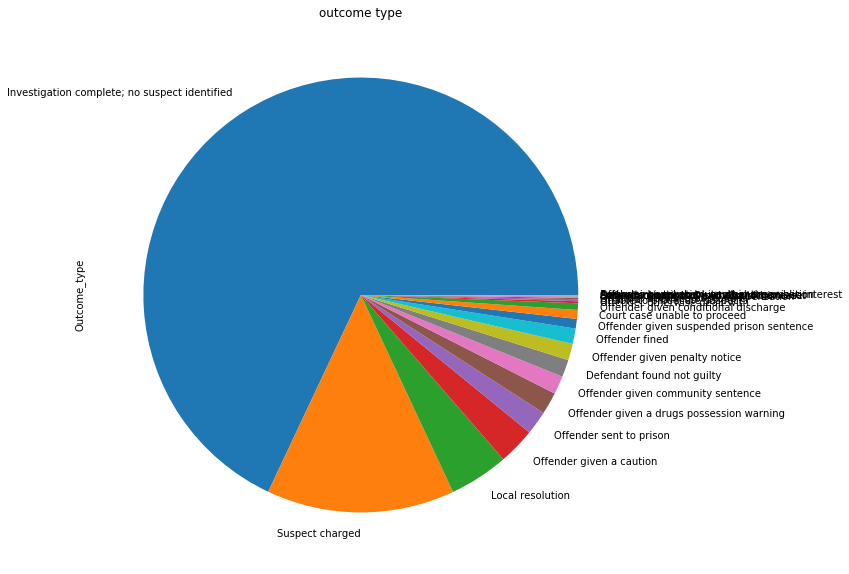

In [30]:
outcome_type = outcome_df.Outcome_type.value_counts(dropna=False)
# outcome_type.plot.pie(y='outcome_data', figsize=(5, 25))
# outcome_type.plot.bar(x='lab', y='val', rot=0, figsize=(5, 5))
# pd.DataFrame(outcome_type)
outcome_type.plot(kind='pie', figsize=(12, 10), title='outcome type')

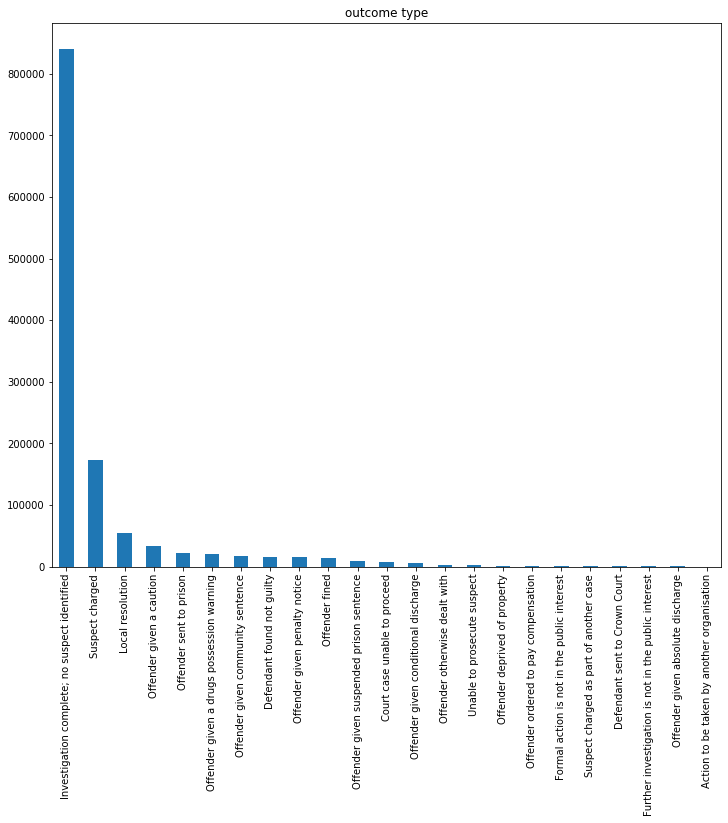

In [29]:
# get bar chart for outcome type

# outcome_type.plot(kind='bar', figsize=(12, 10), title=c).savefig('EU1.png', bbox_inches='tight')
# outcome_type.plot.bar(x='lab', y='val', rot=0, figsize=(5, 5))
outcome_type.plot(kind='bar', figsize=(12, 10), title='outcome type')

# Remove duplicate Crime IDs so that only the recent outcome update will be availble in the dataset

## Before duplicate removal - Test how many are there

In [45]:
# Check total unique crimes available in the dataset 
total_records = len(outcome_df.Crime_ID)
total_unique_records = len(outcome_df.Crime_ID.unique())
print("Total number of incidents confirmed as a crime (having duplicates): "+str(total_records))
print("Total unique number of incidents confirmed as a crime: "+str(total_unique_records))
print("Total number of duplicate incidents removed from the dataset: "+str(total_records-total_unique_records))

Total number of incidents confirmed as a crime (having duplicates): 1236024
Total unique number of incidents confirmed as a crime: 996131
Total number of duplicate incidents removed from the dataset: 239893


## Test records of crimes before removing duplicates

In [53]:
test_duplicate()

First crime id duplicate record count:  28
Second crime id duplicate record count:  17
Third crime id duplicate record count:  17
Fourth crime id duplicate record count:  16
Fifth crime id duplicate record count:  16


In [99]:
test_dup = outcome_df[['Crime_ID','Outcome_month','Outcome_type']][(outcome_df.Crime_ID == '3b60aed0ce6c29f63a00e44822492dcdc419b68a0974e53e6884359dc2aec1aa')]
# test_dup.sort_values(by='Outcome_month', ascending=False)
test_dup
# outcome_df.sort_values(by='Outcome_month', ascending=False)

KeyError: "['Outcome_type'] not in index"

## Remove duplicates

### Sort the outcome dataset on the Month basis to bring latest updated outcome on the top for each crime

Outcome dataset sorting on the Month basis is require to bring latest updated outcome on the top for each crime ids and rest will lie beneath. This is important step because only the latest records are going to retain and all previous/historical outcome update would be deleted.

In [70]:
# Sort the outcome data frame with Month column in descending order to get the latest crime id entry on top
outcome_df = outcome_df.sort_values(by='Outcome_month', ascending=False)

In [ ]:
# Test if the latest crime id is appearing on the top 
# outcome_df[outcome_df.Crime_ID == ('3b60aed0ce6c29f63a00e44822492dcdc419b68a0974e53e6884359dc2aec1aa')].sort_values(by='Outcome_month', ascending=False).head(10)


### Remove duplicate Crime IDs so that only the recent outcome update will be availble in the dataset

In [71]:
# Remove all the duplicate records except first instance of it
outcome_df = outcome_df.drop_duplicates(subset='Crime_ID', keep='first')

In [73]:
test_dup = outcome_df[['Crime_ID','Outcome_month','Outcome_type']][(outcome_df.Crime_ID == '3b60aed0ce6c29f63a00e44822492dcdc419b68a0974e53e6884359dc2aec1aa')]
test_dup

,Crime_ID,Outcome_month,Outcome_type
647709,3b60aed0ce6c29f63a00e44822492dcdc419b68a0974e5...,2018-03,Offender sent to prison


## Test records of crimes after removing duplicates¶

In [13]:
test_duplicate()

First crime id duplicate record count:  1
Second crime id duplicate record count:  1
Third crime id duplicate record count:  1
Fourth crime id duplicate record count:  1
Fifth crime id duplicate record count:  1


## Get total record count after duplicate removal

In [15]:
print('After removing duplicates total record counts are:', get_record_count())

After removing duplicates total record counts are: 996131


In [81]:
outcome_df.head(1)

,Crime_ID,Outcome_month,Reported_by,Falls_within,Longitude,Latitude,Location,LSOA_code,LSOA_name,Outcome_type,Borough_name,Id,Name
0,62c6cc3d7fd777ba389e57f37a82781c384b9e8122ff53...,2019-12,Metropolitan Police Service,Metropolitan Police Service,-0.205025,51.526358,On or near BRAVINGTON PLACE,E01004718,Westminster 004A,Offender given penalty notice,Westminster,12,Westminster


In [79]:
london_borough_df.head(1)

,Id,Name
0,1,Camden


# Integrate "London Borough CSV" with "Crime Outcome CSV"
*** 
Still outcome dataset contains one more problem. Total number of boroughs it contains is more than 32 which fall under metropolitan police limit. Hence we need just the London Boroughs and not all. 

## Derive new column for Borough_name from LSOA_name

In [74]:
# Step1: Create new column inside the outcome dataset for the boroughs. This will come out from LSOA_name.
outcome_df['Borough_name'] = outcome_df.LSOA_name[(outcome_df.LSOA_name.isnull()==False)].str[:-5]

In [78]:
# Step2: Test boroughs count before integrating outcome dataset with the boroughs dataset
print('Boroughs count - before Data Integration:',len(outcome_df.Borough_name.unique()))

Boroughs count - before Data Integration: 238


## Integration key used to merge between two datasets is 'Borough_name'

In [82]:
# Merge london_borough with the outcome data to get relevant records only
outcome_df = pd.merge(left=outcome_df, right=london_borough_df, left_on='Borough_name', right_on='Name')

# Remove un-necessary columns after merging action
outcome_df = outcome_df.drop(['Id', 'Name'], axis=1)

# Get unique london-boroghs numbers
outcome_df.Borough_name.unique().size

33

In [83]:
# Step3: Test boroughs count after integrating outcome dataset with the boroughs dataset
print('Boroughs count - before Data Integration:',len(outcome_df.Borough_name.unique()))

Boroughs count - before Data Integration: 33


In [84]:
# Check total unique crimes available in the dataset 
total_records = len(outcome_df.Crime_ID)
total_unique_records = len(outcome_df.Crime_ID.unique())
print("Total number of incidents confirmed as a crime (having duplicates): "+str(total_records))
print("Total unique number of incidents confirmed as a crime: "+str(total_unique_records))
print("Total number of duplicate incidents removed from the dataset: "+str(total_records-total_unique_records))

Total number of incidents confirmed as a crime (having duplicates): 977637
Total unique number of incidents confirmed as a crime: 977637
Total number of duplicate incidents removed from the dataset: 0


In [88]:
outcome_df.head(1)

,Crime_ID,Outcome_month,Reported_by,Falls_within,Longitude,Latitude,Location,LSOA_code,LSOA_name,Outcome_type,Borough_name
0,62c6cc3d7fd777ba389e57f37a82781c384b9e8122ff53...,2019-12,Metropolitan Police Service,Metropolitan Police Service,-0.205025,51.526358,On or near BRAVINGTON PLACE,E01004718,Westminster 004A,Offender given penalty notice,Westminster


## Remove all the non required features from the dataset
***

Remove below features:
['Reported_by', 'Falls_within','Longitude', 'Latitude', 'Location', 'LSOA_code', 'LSOA_name', 'Borough_name']

Retain below features:
['Crime_ID', 'Outcome_month', 'Outcome_type']

In [89]:
# Just retrieve the features which are required for this dataset
outcome_df = outcome_df[['Crime_ID', 'Outcome_month', 'Outcome_type']]

### Rename 'Outcome_type' column to 'Latest_Outcome_type' for better readability

In [90]:
# Rename the Outcome_type to Latest_outcome_type
outcome_df.rename(columns = {'Outcome_type':'Latest_Outcome_type'}, inplace = True)

C:\Users\ashirhgang\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [97]:
outcome_df.head()
# outcome_df.shape[0]
# outcome_df.isna().sum() 

,Crime_ID,Outcome_month,Latest_Outcome_type
0,62c6cc3d7fd777ba389e57f37a82781c384b9e8122ff53...,2019-12,Offender given penalty notice
1,a428eb8824ae8f314466fdc62f6d55fac9f42ab3f460b1...,2019-12,Local resolution
2,c5d90e22dce8f434e216f8d9109c0dd26034bc95eac2d1...,2019-12,Local resolution
3,6537a672718df4467f7b0fb4c7a46d169a859d95621751...,2019-12,Offender given a caution
4,66114a6086c20f89b417ea1ce3ca96b40d91c138d2c911...,2019-12,Local resolution


# Save the clean file as the outcome-stage.csv

In [98]:
outcome_df.to_csv(STAGING_PATH+STAGE_FILENAME, sep=',', encoding='utf-8', index=None, header = True)
print('File ',STAGE_FILENAME,'gets created!')
print('Location:',STAGING_PATH)

File  outcome-staging.csv gets created!
Location: C://SHU/ADMP/Assessment_02/github-repos/admp-csvs/staging/
